In [23]:
%cd ~/Dropbox/research/football/code/sfm
import sfmnet
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import imageio

/Users/ajaffe/Dropbox/research/football/code/sfm


In [5]:
chkpt = torch.load('/Users/ajaffe/Dropbox/research/football/models/sfm-lrnoreg_570823_0.0002_128.pt', map_location=torch.device('cpu'))
m = sfmnet.SfMNet(H=24, W=40, conv_depth=3, fc_layer_width=128)

m.load_state_dict(chkpt['model_state_dict'])

<All keys matched successfully>

(array([ 3., 11.,  7., 21., 23., 23., 20., 12.,  3.,  5.]),
 array([-0.10647599, -0.08170789, -0.05693979, -0.03217168, -0.00740358,
         0.01736452,  0.04213263,  0.06690073,  0.09166884,  0.11643694,
         0.14120504], dtype=float32),
 <a list of 10 Patch objects>)

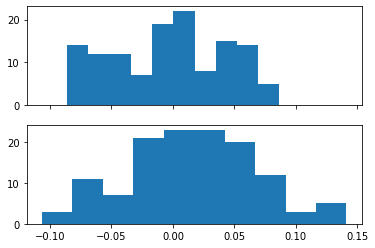

In [21]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.hist(m.fc3.weight[0].detach().numpy())
ax2.hist(m.fc3.weight[1].detach().numpy())

In [31]:
ds = np.empty((999,2))
with torch.no_grad():
    for i in range(999):
        im_1 = torch.tensor(imageio.imread(f'~/Dropbox/research/football/datasets/gradient_ball_slow_speed_40x24/image{i}.png'), dtype=torch.float32).permute(2, 0, 1) / 255 
        im_2 = torch.tensor(imageio.imread(f'~/Dropbox/research/football/datasets/gradient_ball_slow_speed_40x24/image{i+1}.png'), dtype=torch.float32).permute(2, 0, 1) / 255
        out, mask, flow, displacement = m(torch.cat((im_1, im_2)).unsqueeze(0))
        ds[i] = displacement.squeeze()

mean-x=-0.007623445809454293, var-x=2.8144504178551746e-06
mean-y=1.2872437242869739, var-y=0.08196330017243789


(array([176., 116.,  63.,  86.,  91.,  92.,  67.,  98., 105., 105.]),
 array([0.85951912, 0.95112804, 1.04273696, 1.13434588, 1.22595479,
        1.31756371, 1.40917263, 1.50078155, 1.59239047, 1.68399938,
        1.7756083 ]),
 <a list of 10 Patch objects>)

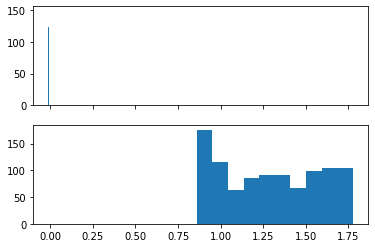

In [38]:
mean = np.mean(ds, axis=0)
var = np.var(ds, axis=0)
print(f'mean-x={mean[0]}, var-x={var[0]}')
print(f'mean-y={mean[1]}, var-y={var[1]}')
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.hist(ds[:,0])
ax2.hist(ds[:,1])